In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
df=pd.read_csv("C:/Users/rohan/Downloads/Zoo.csv")

In [2]:

df.shape

(101, 18)

In [3]:

df.duplicated().sum()

0

In [4]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='type', ylabel='count'>

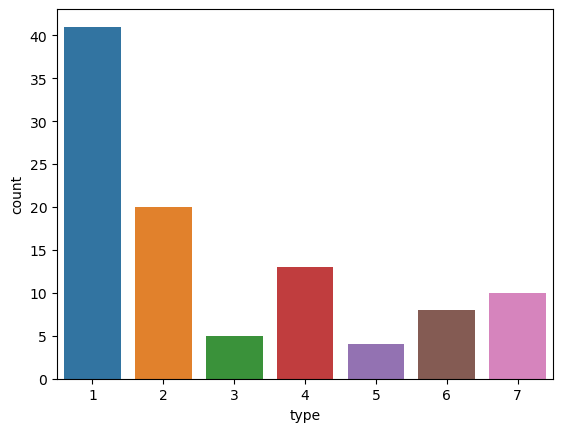

In [6]:
sns.countplot(data=df, x="type")

In [7]:
from sklearn.model_selection import train_test_split

In [8]:

x=df.iloc[:,1:17]
y=df['type']

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)


In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

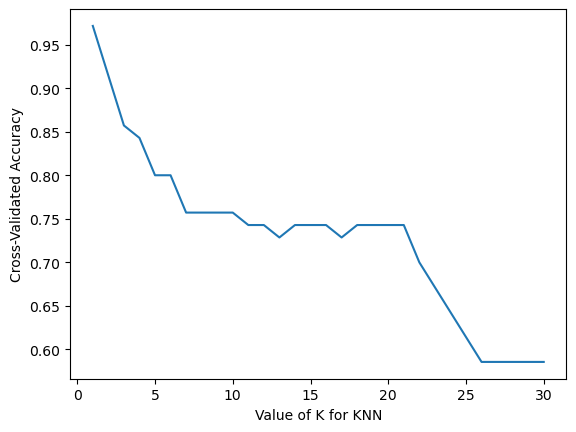

In [14]:
k_range = range(1, 31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    train_scores = cross_val_score(knn, x_train, y_train, cv=5)
    k_scores.append(train_scores.mean())
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [15]:
model = KNeighborsClassifier(n_neighbors=2)

In [16]:
model.fit(x_train, y_train)


KNeighborsClassifier(n_neighbors=2)

In [17]:
model.score(x_test, y_test)


0.967741935483871

In [18]:
from sklearn.metrics import confusion_matrix
pred = model.predict(x_test)
cm = confusion_matrix(y_test, pred)
cm


array([[15,  0,  0,  0,  0,  0,  0],
       [ 0,  3,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  2,  0,  0,  0],
       [ 0,  0,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  0,  5,  0],
       [ 0,  0,  0,  0,  0,  1,  2]], dtype=int64)

In [19]:
pred_df = pd.DataFrame({'Actual' : y_test, 'Predicted' : pred})
pred_df.head()

Actual  Predicted
84       1          1
55       1          1
66       1          1
67       1          1
45       1          1

Text(58.222222222222214, 0.5, 'Truth')

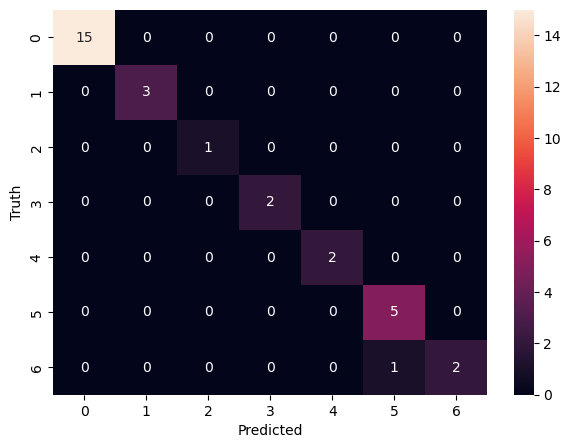

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')